In [1]:
import h5py

file_path = 'input_data/large Specimen 1 averaging test 25 frames.h5oina'

# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as file:
    # Access the dataset
    dataset = file['/1/EBSD/Data/Processed Patterns']
    
    # Print dataset dtype and shape
    print("Dataset dtype:", dataset.dtype)
    print("Dataset shape:", dataset.shape)


Dataset dtype: uint8
Dataset shape: (28905, 128, 156)


In [2]:
import numpy as np
import h5py

file_path = 'input_data/large Specimen 1 averaging test 25 frames.h5oina'

# Open the HDF5 file in read mode to get the dtype of the existing dataset
with h5py.File(file_path, 'r') as file:
    dataset = file['/1/EBSD/Data/Processed Patterns']
    dtype = dataset.dtype
    shape = dataset.shape

print("Existing dataset dtype:", dtype)

# Create new data with the same dtype
matrices = np.ones((28905, 128, 156), dtype=dtype)

# Check the type of the created matrices
print("New data dtype:", matrices.dtype)

# Optionally, print shape and values to verify
print("New data shape:", matrices.shape)


Existing dataset dtype: uint8
New data dtype: uint8
New data shape: (28905, 128, 156)


Dataset dtype: uint8
Dataset shape: (28905, 128, 156)
Pierwszy obraz został nadpisany wartościami 0 (czarny).


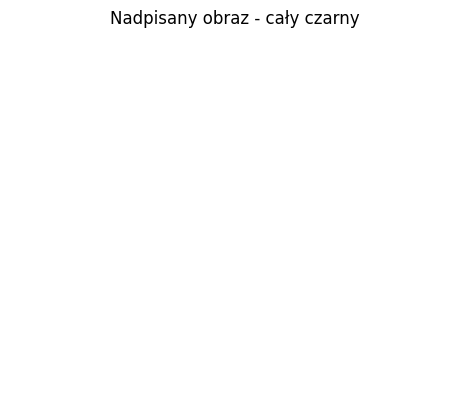

In [19]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Ścieżka do pliku HDF5
file_path = 'input_data/large Specimen 1 averaging test 25 frames.h5oina'

# Otwórz plik HDF5 w trybie odczytu i zapisu
with h5py.File(file_path, 'r+') as file:
    # Dostęp do zestawu danych z obrazami EBSD
    try:
        dataset = file['/1/EBSD/Data/Processed Patterns']
    except KeyError:
        raise KeyError("Ścieżka do datasetu nie została odnaleziona. Upewnij się, że jest poprawna.")
    
    # Sprawdzenie typu danych i wymiarów zestawu danych
    dtype = dataset.dtype
    shape = dataset.shape
    print(f"Dataset dtype: {dtype}")
    print(f"Dataset shape: {shape}")

    if dtype != np.uint8:
        raise ValueError(f"Oczekiwano typu danych uint8, ale otrzymano: {dtype}")

    # Tworzenie czarnej macierzy o takich samych wymiarach jak pierwszy obraz w zestawie
    black_matrix = np.full(dataset[0].shape,255, dtype=dtype)

    # Nadpisanie pierwszego obrazu czarną macierzą (wartości 0)
    dataset[0] = black_matrix

    print("Pierwszy obraz został nadpisany wartościami 0 (czarny).")

    # Wyświetlenie macierzy w formie obrazu z ustawionym zakresem vmin i vmax
    plt.imshow(black_matrix, cmap='gray', vmin=0, vmax=255)
    plt.title('Nadpisany obraz - cały czarny')
    plt.axis('off')  # Ukrycie osi
    plt.show()
